# KE5105 - Building Electrical Consumption Forecasting

# Extract, Transform and Load Data 3 - Data Exploration

## Summary of Findings

to be updated

## Load libraries

In [1]:
%matplotlib inline

import os
import myUtilities as myUtils
import pandas as pd
import matplotlib.pyplot as plt
import math
import pickle
import random
from datetime import datetime
from pandas.tseries.offsets import MonthBegin

## Load cumulative data

In [2]:
# Load the combined building data for SDE-3.
sde3_df_list = myUtils.load_data_by_bldg(['SDE-3'], type='combined')
sde3_df_list[0][0]

'SDE-3'

In [3]:
sde3_df_list[0][1].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40460 entries, 2015-06-01 00:00:00 to 2018-07-31 23:00:00
Data columns (total 13 columns):
PWMSDE3IC1             39779 non-null float64
PWMSDE3IC2             39779 non-null float64
PWMSDE3MCC(AC)         39779 non-null float64
PWMCELCIC1             39519 non-null float64
PWMCELCIC2             39519 non-null float64
PWMSDE1                40401 non-null float64
PWMSDE2SSB             40416 non-null float64
PWMSDE2AC              40416 non-null float64
PWMSDE3Ext             40401 non-null float64
PWMStreetLight         39779 non-null float64
BTUSDE3ChillerPlant    39586 non-null float64
BTUSDE32               39586 non-null float64
BTUSDE31&2             39587 non-null float64
dtypes: float64(13)
memory usage: 4.3 MB


In [4]:
len(sde3_df_list[0][1])

40460

In [5]:
sde3_df_list[0][1].iloc[:5, :5]

,PWMSDE3IC1,PWMSDE3IC2,PWMSDE3MCC(AC),PWMCELCIC1,PWMCELCIC2
Pt_timeStamp,,,,,
2015-06-01 00:00:00,7273387.0,6296006.0,4107576.50,NaN,NaN
2015-06-01 00:30:00,7273447.0,6296013.5,4107577.25,NaN,NaN
2015-06-01 01:00:00,7273506.0,6296020.0,4107578.00,NaN,NaN
2015-06-01 01:30:00,7273563.5,6296027.0,4107579.25,NaN,NaN
2015-06-01 02:00:00,7273622.5,6296035.5,4107580.25,NaN,NaN


In [6]:
sde3_df_list[0][1].iloc[-10:, :5]

,PWMSDE3IC1,PWMSDE3IC2,PWMSDE3MCC(AC),PWMCELCIC1,PWMCELCIC2
Pt_timeStamp,,,,,
2018-07-31 18:30:00,1108819.75,764573.38,0.0,1600592.88,726029.81
2018-07-31 19:00:00,NaN,NaN,NaN,1600595.63,726033.00
2018-07-31 19:30:00,NaN,NaN,NaN,1600595.75,726035.94
2018-07-31 20:00:00,1109030.75,764756.06,0.0,1600595.88,726038.88
2018-07-31 20:30:00,1109094.63,764805.31,0.0,1600596.00,726041.69
2018-07-31 21:00:00,1109160.88,764856.81,0.0,1600596.00,726044.31
2018-07-31 21:30:00,1109226.50,764905.56,0.0,1600596.00,726046.81
2018-07-31 22:00:00,1109290.25,764951.31,0.0,1600596.13,726049.13
2018-07-31 22:30:00,1109355.00,764992.31,0.0,1600596.25,726051.38


In [7]:
#Get the min, max month/year
start = sde3_df_list[0][1].index.min() - MonthBegin(1)  # set to first day of month
end = sde3_df_list[0][1].index.max() + MonthBegin(1)  # set to last day of month
end = end.replace(hour=0)  # set time of day to 00:00 else it is 23:00
print(start, end)

# Reindex
sde3_df_list[0][1] = myUtils.reindex_ts_df(sde3_df_list[0][1], start, end)

2015-05-01 00:00:00 2018-08-01 00:00:00


In [8]:
sde3_df_list[0][1].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57025 entries, 2015-05-01 00:00:00 to 2018-08-01 00:00:00
Freq: 30T
Data columns (total 13 columns):
PWMSDE3IC1             39778 non-null float64
PWMSDE3IC2             39778 non-null float64
PWMSDE3MCC(AC)         39778 non-null float64
PWMCELCIC1             39517 non-null float64
PWMCELCIC2             39517 non-null float64
PWMSDE1                40394 non-null float64
PWMSDE2SSB             40412 non-null float64
PWMSDE2AC              40412 non-null float64
PWMSDE3Ext             40394 non-null float64
PWMStreetLight         39778 non-null float64
BTUSDE3ChillerPlant    39585 non-null float64
BTUSDE32               39585 non-null float64
BTUSDE31&2             39586 non-null float64
dtypes: float64(13)
memory usage: 6.1 MB


In [9]:
sde3_PWM_columns = []
for i in sde3_df_list[0][1].columns:
    if 'PWM' in i:
        sde3_PWM_columns.append(i)
sde3_PWM_columns

['PWMSDE3IC1',
 'PWMSDE3IC2',
 'PWMSDE3MCC(AC)',
 'PWMCELCIC1',
 'PWMCELCIC2',
 'PWMSDE1',
 'PWMSDE2SSB',
 'PWMSDE2AC',
 'PWMSDE3Ext',
 'PWMStreetLight']

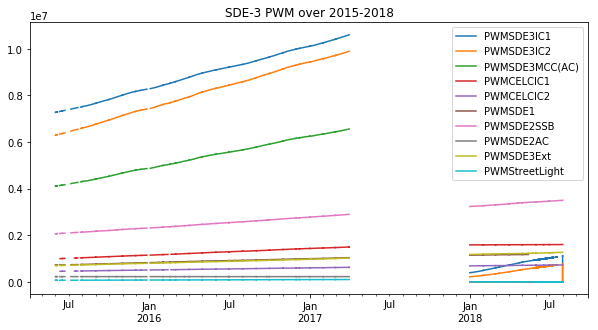

In [10]:
sde3_df_list[0][1].loc[:, sde3_PWM_columns].plot(figsize=(10, 5), title='SDE-3 PWM over 2015-2018')

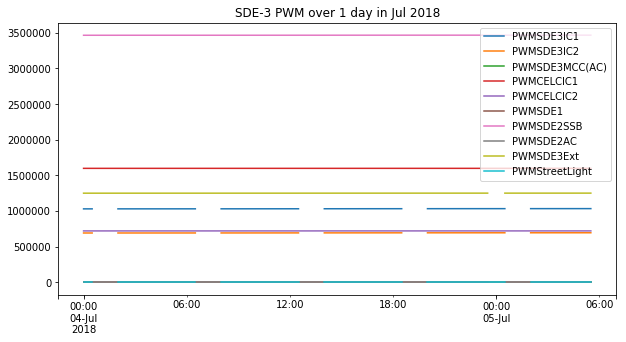

In [11]:
sde3_df_list[0][1].loc['2018-07-04 00H':'2018-07-05 05H', sde3_PWM_columns].plot(figsize=(10, 5), title='SDE-3 PWM over 1 day in Jul 2018')

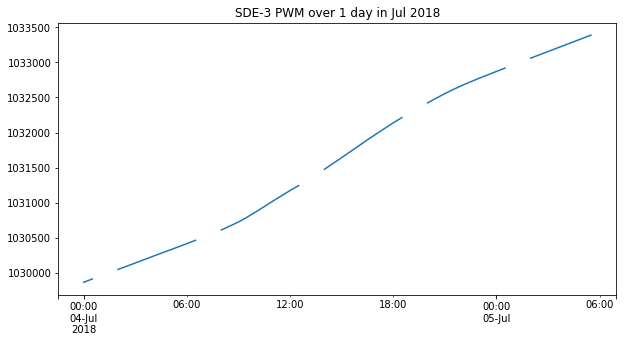

In [12]:
sde3_df_list[0][1].loc['2018-07-04 00H':'2018-07-05 05H', 'PWMSDE3IC1'].plot(figsize=(10, 5), title='SDE-3 PWM over 1 day in Jul 2018')

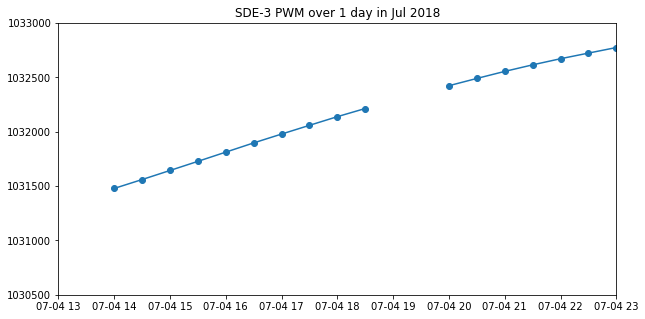

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(sde3_df_list[0][1].loc['2018-07-04 13H':'2018-07-04 23H', 'PWMSDE3IC1'].index,
            sde3_df_list[0][1].loc['2018-07-04 13H':'2018-07-04 23H', 'PWMSDE3IC1'].values)
plt.plot(sde3_df_list[0][1].loc['2018-07-04 13H':'2018-07-04 23H', 'PWMSDE3IC1'])
plt.axis(['2018-07-04 13H', '2018-07-04 23H', 1030500, 1033000])
plt.title('SDE-3 PWM over 1 day in Jul 2018')
plt.show()

It looks like the cumulative PWM data may fit a linear or polynomial regression model.

## Load the aggregated data

In [21]:
# Loads the aggregated PWM data for SDE-3. This csv file was created just for this data exploration.
sde3_agg_df = pd.read_csv(os.path.join('source', 'test_data', 'SDE-3.agg.csv'), index_col=0, parse_dates=True)
sde3_agg_df.iloc[:5, -5:]

,PWM-Street Light_30min_avg,BTU-SDE3-Chiller Plant_30min_avg,BTU-SDE3-2_30min_avg,BTU-SDE3 1&2_30min_avg,PWM_30min_avg
Pt_timeStamp,,,,,
2015-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2015-05-01 00:30:00,NaN,NaN,NaN,NaN,NaN
2015-05-01 01:00:00,NaN,NaN,NaN,NaN,NaN
2015-05-01 01:30:00,NaN,NaN,NaN,NaN,NaN
2015-05-01 02:00:00,NaN,NaN,NaN,NaN,NaN


In [22]:
sde3_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57025 entries, 2015-05-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 27 columns):
PWM-SDE3 IC1                        39778 non-null float64
PWM-SDE3 IC2                        39778 non-null float64
PWM-SDE3 MCC (AC)                   39778 non-null float64
PWM-CELC IC1                        39517 non-null float64
PWM-CELC IC2                        39517 non-null float64
PWM-SDE1                            40394 non-null float64
PWM-SDE2 SSB                        40412 non-null float64
PWM-SDE2 AC                         40412 non-null float64
PWM-SDE3 Ext                        40394 non-null float64
PWM-Street Light                    39778 non-null float64
BTU-SDE3-Chiller Plant              39585 non-null float64
BTU-SDE3-2                          39585 non-null float64
BTU-SDE3 1&2                        39586 non-null float64
PWM-SDE3 IC1_30min_avg              39551 non-null float64
PWM-SDE3 IC2_30min_avg        

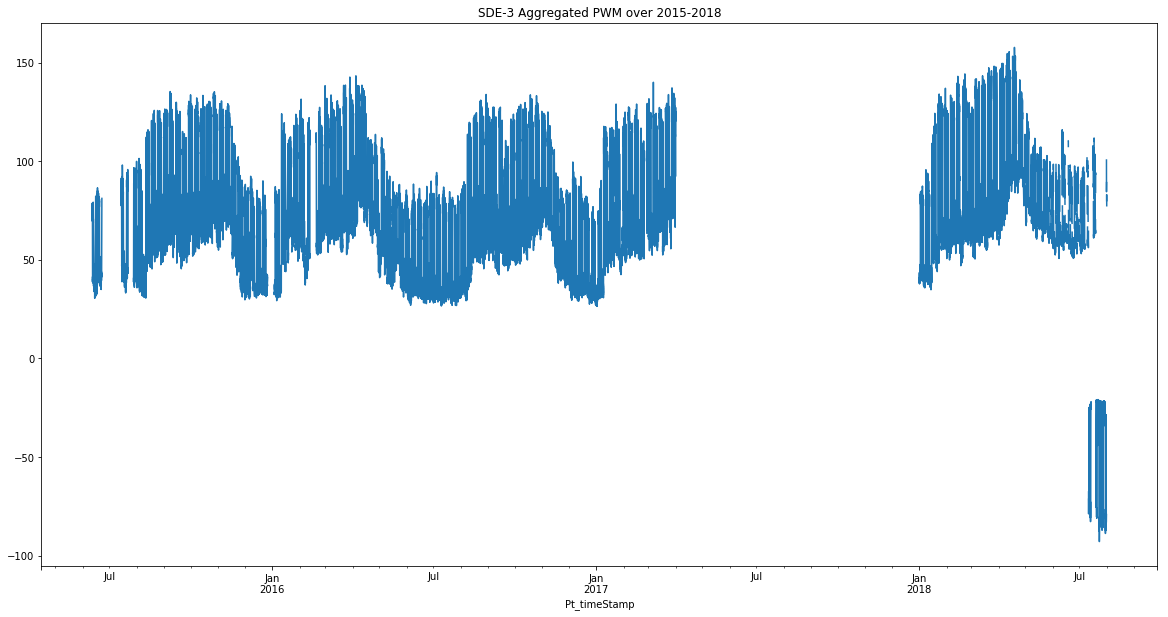

In [23]:
sde3_agg_df['PWM_30min_avg'].plot(figsize=(20, 10), title='SDE-3 Aggregated PWM over 2015-2018')

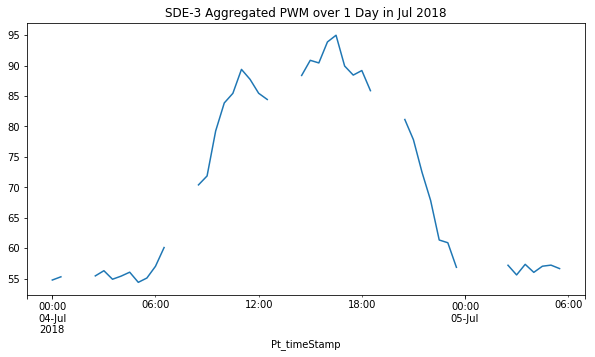

In [26]:
sde3_agg_df.loc['2018-07-04 00H':'2018-07-05 05H', 'PWM_30min_avg'].plot(figsize=(10, 5), title='SDE-3 Aggregated PWM over 1 Day in Jul 2018')

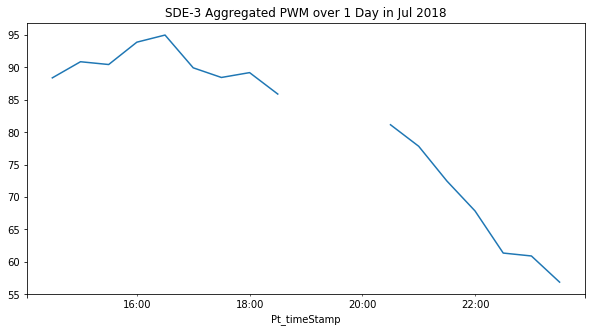

In [28]:
sde3_agg_df.loc['2018-07-04 13H':'2018-07-04 23H', 'PWM_30min_avg'].plot(figsize=(10, 5), title='SDE-3 Aggregated PWM over 1 Day in Jul 2018')